# PCA_for_Spotify_Recs

**Name(s)**: (your name(s) here)

**Website Link**: (your website link)

In [2]:
import pandas as pd
import numpy as np
from pathlib import Path

## Step 0: Creating a Cleaned Dataframe to Refer Back to

In [5]:
pd.set_option('display.max_columns', None)

In [7]:
data = pd.read_csv("Data/spotify.csv")
data.head()                    

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [13]:
new_data = data
new_data['years'] = [int(x.split('-')[0]) for x in new_data['track_album_release_date']]
new_data = new_data.drop(columns = 'track_album_release_date')
new_data

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,years
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754,2019
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600,2019
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616,2019
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.718,0.930,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093,2019
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.650,0.833,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.428,0.922,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375,2014
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.522,0.786,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120,2013
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.529,0.821,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112,2014
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.626,0.888,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432,2014


In [15]:
new_data = new_data[new_data['years']>1989]
new_data

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,years
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754,2019
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600,2019
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616,2019
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.718,0.930,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093,2019
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.650,0.833,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.428,0.922,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375,2014
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.522,0.786,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120,2013
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.529,0.821,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112,2014
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,progressive electro house,0.626,0.888,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432,2014


## Step 1: Data Cleaning and EDA

In [18]:
pd.set_option('display.max_columns', None)

In [20]:
data = pd.read_csv("Data/spotify.csv")
data.head()                    

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [22]:
#data.info()

In [24]:
data.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

In [26]:
cols_to_drop = ['track_id', 'track_name', 'track_artist', 'track_album_id', 'track_album_name','playlist_name', 'playlist_id', 'mode']
num_data = data.drop(columns=cols_to_drop)
num_data

,track_popularity,track_album_release_date,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,66,2019-06-14,pop,dance pop,0.748,0.916,6,-2.634,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,67,2019-12-13,pop,dance pop,0.726,0.815,11,-4.969,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600
2,70,2019-07-05,pop,dance pop,0.675,0.931,1,-3.432,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,60,2019-07-19,pop,dance pop,0.718,0.930,7,-3.778,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,69,2019-03-05,pop,dance pop,0.650,0.833,1,-4.672,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,42,2014-04-28,edm,progressive electro house,0.428,0.922,2,-1.814,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,20,2013-03-08,edm,progressive electro house,0.522,0.786,0,-4.462,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,14,2014-04-21,edm,progressive electro house,0.529,0.821,6,-4.899,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,15,2014-01-01,edm,progressive electro house,0.626,0.888,2,-3.361,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432


In [28]:
#[x for x in num_data['track_album_release_date'] if len(x) < 5]

In [30]:
num_data['track_album_release_date']

0        2019-06-14
1        2019-12-13
2        2019-07-05
3        2019-07-19
4        2019-03-05
            ...    
32828    2014-04-28
32829    2013-03-08
32830    2014-04-21
32831    2014-01-01
32832    2014-03-03
Name: track_album_release_date, Length: 32833, dtype: object

In [32]:
num_data['years'] = [int(x.split('-')[0]) for x in num_data['track_album_release_date']]
num_data = num_data.drop(columns = 'track_album_release_date')
num_data

,track_popularity,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,years
0,66,pop,dance pop,0.748,0.916,6,-2.634,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754,2019
1,67,pop,dance pop,0.726,0.815,11,-4.969,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600,2019
2,70,pop,dance pop,0.675,0.931,1,-3.432,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616,2019
3,60,pop,dance pop,0.718,0.930,7,-3.778,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093,2019
4,69,pop,dance pop,0.650,0.833,1,-4.672,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,42,edm,progressive electro house,0.428,0.922,2,-1.814,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375,2014
32829,20,edm,progressive electro house,0.522,0.786,0,-4.462,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120,2013
32830,14,edm,progressive electro house,0.529,0.821,6,-4.899,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112,2014
32831,15,edm,progressive electro house,0.626,0.888,2,-3.361,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432,2014


In [34]:
num_data['years']

0        2019
1        2019
2        2019
3        2019
4        2019
         ... 
32828    2014
32829    2013
32830    2014
32831    2014
32832    2014
Name: years, Length: 32833, dtype: int64

In [36]:
#Number of songs from every year

num_data.groupby('years').count()

,track_popularity,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
years,,,,,,,,,,,,,,
1957,2,2,2,2,2,2,2,2,2,2,2,2,2,2
1958,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1960,4,4,4,4,4,4,4,4,4,4,4,4,4,4
1961,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1962,2,2,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,2127,2127,2127,2127,2127,2127,2127,2127,2127,2127,2127,2127,2127,2127
2017,2430,2430,2430,2430,2430,2430,2430,2430,2430,2430,2430,2430,2430,2430
2018,3312,3312,3312,3312,3312,3312,3312,3312,3312,3312,3312,3312,3312,3312


In [38]:
num_data.pivot_table(
    index="playlist_genre",
    columns='years',
    values='track_popularity',
    aggfunc='count'
)

years,1957,1958,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
playlist_genre,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
edm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,1.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.0,1.0,1.0,NaN,1.0,3.0,4.0,3.0,4.0,5.0,3.0,8.0,16.0,29.0,43.0,45.0,37.0,74.0,170.0,313.0,564.0,462.0,498.0,486.0,755.0,2321.0,184.0
latin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,3.0,NaN,1.0,4.0,2.0,2.0,6.0,5.0,9.0,16.0,11.0,17.0,12.0,3.0,13.0,11.0,18.0,13.0,23.0,21.0,26.0,14.0,26.0,19.0,47.0,76.0,69.0,92.0,101.0,119.0,118.0,126.0,84.0,133.0,123.0,165.0,277.0,375.0,396.0,567.0,1879.0,131.0
pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,1.0,1.0,2.0,1.0,7.0,4.0,6.0,14.0,8.0,13.0,19.0,9.0,11.0,21.0,9.0,10.0,16.0,7.0,6.0,7.0,15.0,13.0,17.0,12.0,13.0,18.0,9.0,33.0,23.0,28.0,24.0,22.0,50.0,50.0,112.0,95.0,173.0,144.0,176.0,227.0,316.0,479.0,531.0,505.0,704.0,1373.0,170.0
r&b,1.0,NaN,4.0,1.0,1.0,1.0,1.0,3.0,3.0,5.0,2.0,4.0,7.0,4.0,5.0,5.0,10.0,8.0,9.0,3.0,5.0,5.0,5.0,3.0,5.0,7.0,10.0,15.0,28.0,31.0,62.0,47.0,77.0,84.0,97.0,80.0,72.0,64.0,89.0,89.0,65.0,75.0,101.0,97.0,100.0,103.0,93.0,107.0,85.0,87.0,131.0,69.0,85.0,125.0,127.0,116.0,199.0,247.0,351.0,464.0,452.0,1107.0,93.0
rap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,NaN,1.0,NaN,1.0,NaN,NaN,2.0,2.0,1.0,1.0,3.0,2.0,8.0,35.0,5.0,14.0,25.0,41.0,72.0,80.0,75.0,95.0,49.0,111.0,89.0,54.0,59.0,54.0,98.0,90.0,126.0,101.0,88.0,75.0,58.0,74.0,80.0,117.0,93.0,175.0,235.0,295.0,463.0,705.0,1824.0,159.0
rock,1.0,1.0,NaN,NaN,1.0,4.0,8.0,8.0,16.0,35.0,19.0,50.0,72.0,66.0,68.0,97.0,67.0,99.0,120.0,95.0,116.0,70.0,85.0,66.0,73.0,94.0,108.0,111.0,75.0,114.0,71.0,56.0,46.0,80.0,39.0,51.0,58.0,48.0,35.0,80.0,72.0,67.0,68.0,94.0,59.0,72.0,99.0,176.0,101.0,115.0,142.0,88.0,120.0,97.0,63.0,84.0,105.0,79.0,77.0,116.0,129.0,577.0,48.0


In [40]:
num_data = num_data[num_data['years']>1989]
num_data

,track_popularity,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,years
0,66,pop,dance pop,0.748,0.916,6,-2.634,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754,2019
1,67,pop,dance pop,0.726,0.815,11,-4.969,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600,2019
2,70,pop,dance pop,0.675,0.931,1,-3.432,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616,2019
3,60,pop,dance pop,0.718,0.930,7,-3.778,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093,2019
4,69,pop,dance pop,0.650,0.833,1,-4.672,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,42,edm,progressive electro house,0.428,0.922,2,-1.814,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375,2014
32829,20,edm,progressive electro house,0.522,0.786,0,-4.462,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120,2013
32830,14,edm,progressive electro house,0.529,0.821,6,-4.899,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112,2014
32831,15,edm,progressive electro house,0.626,0.888,2,-3.361,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432,2014


In [42]:
num_data.pivot_table(
    index="playlist_genre",
    columns='years',
    values='track_popularity',
    aggfunc='count'
)

years,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
playlist_genre,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
edm,1.0,1.0,NaN,1.0,1.0,1.0,1.0,NaN,1.0,3.0,4.0,3.0,4.0,5.0,3.0,8.0,16.0,29.0,43.0,45.0,37.0,74.0,170.0,313.0,564.0,462.0,498.0,486.0,755.0,2321.0,184.0
latin,17.0,12.0,3.0,13.0,11.0,18.0,13.0,23.0,21.0,26.0,14.0,26.0,19.0,47.0,76.0,69.0,92.0,101.0,119.0,118.0,126.0,84.0,133.0,123.0,165.0,277.0,375.0,396.0,567.0,1879.0,131.0
pop,16.0,7.0,6.0,7.0,15.0,13.0,17.0,12.0,13.0,18.0,9.0,33.0,23.0,28.0,24.0,22.0,50.0,50.0,112.0,95.0,173.0,144.0,176.0,227.0,316.0,479.0,531.0,505.0,704.0,1373.0,170.0
r&b,77.0,84.0,97.0,80.0,72.0,64.0,89.0,89.0,65.0,75.0,101.0,97.0,100.0,103.0,93.0,107.0,85.0,87.0,131.0,69.0,85.0,125.0,127.0,116.0,199.0,247.0,351.0,464.0,452.0,1107.0,93.0
rap,14.0,25.0,41.0,72.0,80.0,75.0,95.0,49.0,111.0,89.0,54.0,59.0,54.0,98.0,90.0,126.0,101.0,88.0,75.0,58.0,74.0,80.0,117.0,93.0,175.0,235.0,295.0,463.0,705.0,1824.0,159.0
rock,46.0,80.0,39.0,51.0,58.0,48.0,35.0,80.0,72.0,67.0,68.0,94.0,59.0,72.0,99.0,176.0,101.0,115.0,142.0,88.0,120.0,97.0,63.0,84.0,105.0,79.0,77.0,116.0,129.0,577.0,48.0


In [44]:
num_data.groupby("playlist_genre")['danceability'].mean()

playlist_genre
edm      0.654910
latin    0.713518
pop      0.640174
r&b      0.669703
rap      0.717715
rock     0.509439
Name: danceability, dtype: float64

In [46]:
num_data.groupby("playlist_genre")['energy'].mean()

playlist_genre
edm      0.802778
latin    0.708776
pop      0.700655
r&b      0.588926
rap      0.650945
rock     0.764647
Name: energy, dtype: float64

In [48]:
# 12 major keys from 0 to 11
num_data['key'].max()

11

## Step 2: Dimensionality Reduction and PCA

In [51]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [52]:
categorical_columns = ['playlist_genre', 'playlist_subgenre']
encoder = OneHotEncoder(drop='first')
encoded_data = encoder.fit_transform(num_data[categorical_columns]).toarray()
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))
encoded_df

,playlist_genre_latin,playlist_genre_pop,playlist_genre_r&b,playlist_genre_rap,playlist_genre_rock,playlist_subgenre_big room,playlist_subgenre_classic rock,playlist_subgenre_dance pop,playlist_subgenre_electro house,playlist_subgenre_electropop,playlist_subgenre_gangster rap,playlist_subgenre_hard rock,playlist_subgenre_hip hop,playlist_subgenre_hip pop,playlist_subgenre_indie poptimism,playlist_subgenre_latin hip hop,playlist_subgenre_latin pop,playlist_subgenre_neo soul,playlist_subgenre_new jack swing,playlist_subgenre_permanent wave,playlist_subgenre_pop edm,playlist_subgenre_post-teen pop,playlist_subgenre_progressive electro house,playlist_subgenre_reggaeton,playlist_subgenre_southern hip hop,playlist_subgenre_trap,playlist_subgenre_tropical,playlist_subgenre_urban contemporary
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
30382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
30383,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
30384,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [55]:
num_data = num_data.drop(columns=categorical_columns)
num_data

,track_popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,years
0,66,0.748,0.916,6,-2.634,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754,2019
1,67,0.726,0.815,11,-4.969,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600,2019
2,70,0.675,0.931,1,-3.432,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616,2019
3,60,0.718,0.930,7,-3.778,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093,2019
4,69,0.650,0.833,1,-4.672,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,42,0.428,0.922,2,-1.814,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375,2014
32829,20,0.522,0.786,0,-4.462,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120,2013
32830,14,0.529,0.821,6,-4.899,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112,2014
32831,15,0.626,0.888,2,-3.361,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432,2014


In [57]:
num_data.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)

In [59]:
num_data = pd.concat([num_data, encoded_df], axis=1)
num_data

,track_popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,years,playlist_genre_latin,playlist_genre_pop,playlist_genre_r&b,playlist_genre_rap,playlist_genre_rock,playlist_subgenre_big room,playlist_subgenre_classic rock,playlist_subgenre_dance pop,playlist_subgenre_electro house,playlist_subgenre_electropop,playlist_subgenre_gangster rap,playlist_subgenre_hard rock,playlist_subgenre_hip hop,playlist_subgenre_hip pop,playlist_subgenre_indie poptimism,playlist_subgenre_latin hip hop,playlist_subgenre_latin pop,playlist_subgenre_neo soul,playlist_subgenre_new jack swing,playlist_subgenre_permanent wave,playlist_subgenre_pop edm,playlist_subgenre_post-teen pop,playlist_subgenre_progressive electro house,playlist_subgenre_reggaeton,playlist_subgenre_southern hip hop,playlist_subgenre_trap,playlist_subgenre_tropical,playlist_subgenre_urban contemporary
0,66,0.748,0.916,6,-2.634,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754,2019,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,67,0.726,0.815,11,-4.969,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600,2019,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,70,0.675,0.931,1,-3.432,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616,2019,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,60,0.718,0.930,7,-3.778,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093,2019,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,69,0.650,0.833,1,-4.672,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052,2019,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30381,42,0.428,0.922,2,-1.814,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375,2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
30382,20,0.522,0.786,0,-4.462,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120,2013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
30383,14,0.529,0.821,6,-4.899,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112,2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
30384,15,0.626,0.888,2,-3.361,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432,2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [61]:
num_cols = num_data.select_dtypes(include=['float64', 'int64']).columns
num_data

,track_popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,years,playlist_genre_latin,playlist_genre_pop,playlist_genre_r&b,playlist_genre_rap,playlist_genre_rock,playlist_subgenre_big room,playlist_subgenre_classic rock,playlist_subgenre_dance pop,playlist_subgenre_electro house,playlist_subgenre_electropop,playlist_subgenre_gangster rap,playlist_subgenre_hard rock,playlist_subgenre_hip hop,playlist_subgenre_hip pop,playlist_subgenre_indie poptimism,playlist_subgenre_latin hip hop,playlist_subgenre_latin pop,playlist_subgenre_neo soul,playlist_subgenre_new jack swing,playlist_subgenre_permanent wave,playlist_subgenre_pop edm,playlist_subgenre_post-teen pop,playlist_subgenre_progressive electro house,playlist_subgenre_reggaeton,playlist_subgenre_southern hip hop,playlist_subgenre_trap,playlist_subgenre_tropical,playlist_subgenre_urban contemporary
0,66,0.748,0.916,6,-2.634,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754,2019,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,67,0.726,0.815,11,-4.969,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600,2019,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,70,0.675,0.931,1,-3.432,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616,2019,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,60,0.718,0.930,7,-3.778,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093,2019,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,69,0.650,0.833,1,-4.672,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052,2019,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30381,42,0.428,0.922,2,-1.814,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375,2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
30382,20,0.522,0.786,0,-4.462,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120,2013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
30383,14,0.529,0.821,6,-4.899,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112,2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
30384,15,0.626,0.888,2,-3.361,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432,2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [63]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_data[num_cols])
scaled_df = pd.DataFrame(scaled_data, columns=num_cols )
scaled_df

,track_popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,years,playlist_genre_latin,playlist_genre_pop,playlist_genre_r&b,playlist_genre_rap,playlist_genre_rock,playlist_subgenre_big room,playlist_subgenre_classic rock,playlist_subgenre_dance pop,playlist_subgenre_electro house,playlist_subgenre_electropop,playlist_subgenre_gangster rap,playlist_subgenre_hard rock,playlist_subgenre_hip hop,playlist_subgenre_hip pop,playlist_subgenre_indie poptimism,playlist_subgenre_latin hip hop,playlist_subgenre_latin pop,playlist_subgenre_neo soul,playlist_subgenre_new jack swing,playlist_subgenre_permanent wave,playlist_subgenre_pop edm,playlist_subgenre_post-teen pop,playlist_subgenre_progressive electro house,playlist_subgenre_reggaeton,playlist_subgenre_southern hip hop,playlist_subgenre_trap,playlist_subgenre_tropical,playlist_subgenre_urban contemporary
0,0.950718,0.608077,1.199477,0.168478,1.363955,-0.511302,-0.326507,-0.381720,-0.811357,0.069629,0.047449,-0.487633,0.743339,-0.448785,2.158838,-0.450741,-0.479171,-0.336154,-0.203297,-0.146682,4.733906,-0.228755,-0.211836,-0.223123,-0.198868,-0.213274,-0.20756,-0.241231,-0.236846,-0.206523,-0.235215,-0.181688,-0.162315,-0.229233,-0.193257,-0.250934,-0.17955,-0.237311,-0.210646,-0.210391,-0.212429
1,0.990688,0.453263,0.636933,1.552165,0.540170,-0.714514,-0.461300,-0.363316,1.079367,0.824618,-0.770483,-1.043145,0.743339,-0.448785,2.158838,-0.450741,-0.479171,-0.336154,-0.203297,-0.146682,4.733906,-0.228755,-0.211836,-0.223123,-0.198868,-0.213274,-0.20756,-0.241231,-0.236846,-0.206523,-0.235215,-0.181688,-0.162315,-0.229233,-0.193257,-0.250934,-0.17955,-0.237311,-0.210646,-0.210391,-0.212429
2,1.110599,0.094377,1.283023,-1.215210,1.082421,-0.357442,-0.429423,-0.381619,-0.521624,0.479480,0.120552,-0.800996,0.743339,-0.448785,2.158838,-0.450741,-0.479171,-0.336154,-0.203297,-0.146682,4.733906,-0.228755,-0.211836,-0.223123,-0.198868,-0.213274,-0.20756,-0.241231,-0.236846,-0.206523,-0.235215,-0.181688,-0.162315,-0.229233,-0.193257,-0.250934,-0.17955,-0.237311,-0.210646,-0.210391,-0.212429
3,0.710896,0.396967,1.277453,0.445215,0.960353,-0.088428,-0.660301,-0.381679,0.087660,-0.970099,0.044483,-0.930968,0.743339,-0.448785,2.158838,-0.450741,-0.479171,-0.336154,-0.203297,-0.146682,4.733906,-0.228755,-0.211836,-0.223123,-0.198868,-0.213274,-0.20756,-0.241231,-0.236846,-0.206523,-0.235215,-0.181688,-0.162315,-0.229233,-0.193257,-0.250934,-0.17955,-0.237311,-0.210646,-0.210391,-0.212429
4,1.070629,-0.081548,0.737189,-1.215210,0.644951,-0.728062,-0.425325,-0.381720,-0.694686,0.962673,0.119366,-0.586144,0.743339,-0.448785,2.158838,-0.450741,-0.479171,-0.336154,-0.203297,-0.146682,4.733906,-0.228755,-0.211836,-0.223123,-0.198868,-0.213274,-0.20756,-0.241231,-0.236846,-0.206523,-0.235215,-0.181688,-0.162315,-0.229233,-0.193257,-0.250934,-0.17955,-0.237311,-0.210646,-0.210391,-0.212429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30381,-0.008571,-1.643759,1.232895,-0.938472,1.653249,-0.169713,-0.442174,-0.381720,-0.801635,-1.259152,0.274841,-0.321415,0.046495,-0.448785,-0.463212,-0.450741,-0.479171,-0.336154,-0.203297,-0.146682,-0.211242,-0.228755,-0.211836,-0.223123,-0.198868,-0.213274,-0.20756,-0.241231,-0.236846,-0.206523,-0.235215,-0.181688,-0.162315,-0.229233,-0.193257,3.985111,-0.17955,-0.237311,-0.210646,-0.210391,-0.212429
30382,-0.887920,-0.982282,0.475411,-1.491947,0.719039,-0.669033,-0.783208,-0.363054,1.196038,-0.439450,0.270059,2.248393,-0.092874,-0.448785,-0.463212,-0.450741,-0.479171,-0.336154,-0.203297,-0.146682,-0.211242,-0.228755,-0.211836,-0.223123,-0.198868,-0.213274,-0.20756,-0.241231,-0.236846,-0.206523,-0.235215,-0.181688,-0.162315,-0.229233,-0.193257,3.985111,-0.17955,-0.237311,-0.210646,-0.210391,-0.212429
30383,-1.127742,-0.933024,0.670352,0.168478,0.564866,-0.610005,-0.299184,-0.381716,

In [65]:
pca = PCA()
pca.fit(scaled_df)
pca_data = pca.transform(scaled_df)
pca_df = pd.DataFrame(pca_data, columns=[f"PC{i+1}" for i in range(pca_data.shape[1])])
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41
0,1.808754,-1.311930,-1.789925,-1.936813,-1.342234,-1.145669,-0.982861,0.967547,-0.174639,-0.149677,0.647253,0.050398,-1.448352,-1.160452,-0.870887,0.740760,-1.620538,-2.357985,0.951312,-1.224948,-0.689717,0.769113,-0.044267,0.570703,-0.725608,-0.322058,0.184814,0.081937,-0.163332,-0.029502,0.267186,0.142119,0.407117,-0.399928,0.275283,0.067733,-1.601067e-14,5.767256e-15,4.551549e-15,2.493652e-15,3.447490e-15
1,1.419288,-1.200107,-1.860215,-1.843031,-1.206806,-1.396806,-0.859958,0.818058,-1.042590,-0.026397,-0.118915,0.127200,-1.494714,-1.086550,-1.153548,0.674259,-1.608391,-2.524931,1.134287,-1.322425,-0.575981,0.672248,1.293918,0.764909,0.461478,0.849233,-0.531780,0.096055,0.233494,-0.424254,-0.180272,0.000729,-0.023286,0.216575,0.058158,-0.001351,-1.601067e-14,6.100323e-15,5.051150e-15,4.158986e-15,4.668736e-15
2,1.875976,-1.290159,-1.762444,-1.962216,-1.230947,-1.228876,-1.206463,0.866503,-0.192091,-0.204547,0.532790,0.137525,-1.692532,-1.085051,-0.542571,0.819830,-1.516493,-2.182075,0.855139,-1.190950,-0.770458,1.004599,-1.320723,0.751541,-0.399659,-0.228730,0.043189,0.083343,-0.083957,-0.077034,0.245778,0.465484,-0.018393,0.026044,0.329840,0.046139,-1.534454e-14,5.545212e-15,4.607060e-15,3.326319e-15,3.891580e-15
3,1.893066,-1.237458,-1.507265,-2.222810,-1.154812,-0.737988,-0.979129,0.326101,-0.457075,-0.268561,0.303887,0.112986,-1.386490,-1.250177,-0.907821,0.727872,-1.638178,-2.391707,0.967863,-1.259088,-0.665775,0.746984,0.166758,0.936292,-0.443213,0.265143,0.265063,-0.326770,0.072094,0.245372,-0.501840,0.134147,0.436136,-0.755074,0.553967,0.054284,-1.712089e-14,5.323167e-15,4.718083e-15,1.994051e-15,2.892379e-15
4,1.600170,-1.020070,-1.950357,-1.932923,-1.019153,-1.434881,-0.931795,1.005311,-0.086238,-0.124423,0.574031,0.153516,-1.677670,-1.039337,-0.522443,0.842645,-1.508712,-2.169570,0.869313,-1.186811,-0.789139,1.021262,-1.312920,0.781727,-0.509863,-0.286161,-0.158718,0.230592,-0.103286,-0.355535,0.266100,0.248283,-0.270301,0.526748,0.088365,0.016229,-1.467840e-14,5.767256e-15,4.940127e-15,4.381031e-15,5.001803e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30381,2.192113,0.056924,0.527741,-0.320930,-0.516972,1.961682,0.049784,-0.877783,1.575626,-0.103137,0.650610,-1.251167,-1.181242,0.049876,-1.259382,1.053077,0.925771,-0.019259,-0.187631,0.664211,-0.288038,0.042735,-0.745621,-0.464844,0.160501,-0.752066,0.828514,-1.871244,0.681839,0.007722,1.063705,0.631710,-0.849532,-0.230652,-0.173613,-0.023603,1.804939e-15,1.881476e-15,-2.054278e-15,1.466695e-15,6.719329e-16
30382,1.931332,0.925635,0.863665,0.194550,-1.054115,1.671986,1.517723,-1.261977,1.732982,-0.170827,0.379029,-1.405889,-1.539493,0.292239,-1.136600,0.954206,1.026487,0.051935,-0.107729,0.556279,-0.196148,0.314491,-1.137004,0.015194,1.079758,0.420851,0.413965,-0.037496,0.269579,0.082806,0.965312,-1.146981,-0.567129,0.569076,-0.440704,-0.103807,1.693917e-15,2.214542e-15,4.992352e-16,3.465097e-15,2.337267e-15
30383,1.569620,0.309796,0.470288,-0.051632,-0.558234,1.707959,0.916696,-0.639261,1.062753,0.099179,0.673152,-1.088616,-1.008887,0.252858,-1.459645,0.987534,0.958147,-0.099193,0.013944,0.640334,-0.235495,0.047382,0.230998,-0.207705,0.542141,-0.714079,-0.447232,-1.725678,0.572958,-0.302851,0.777170,-0.312657,-0.876976,0.149514,-0.102394,-0.068300,1.416361e-15,2.270054e-15,-1.166099e-15,2.132829e-15,1.560111e-15
30384,2.029371,0.571616,1.142434,0.226420,-1.400968,2.015622,1.689829,-1.079247,1.594593,-0.380976,0.545405,-1.533125,-1.433834,0.258189,-1.277503,0.896646,0.978544,-0.016397,-0.065243,0.546230,-0.143384,0.212457,-0.637169,-0.105252,0.918507,0.220243,0.405971,0.237472,0.171461,0.733158,0.898806,-0.908987,0.040957,0.004450,-0.168882,-

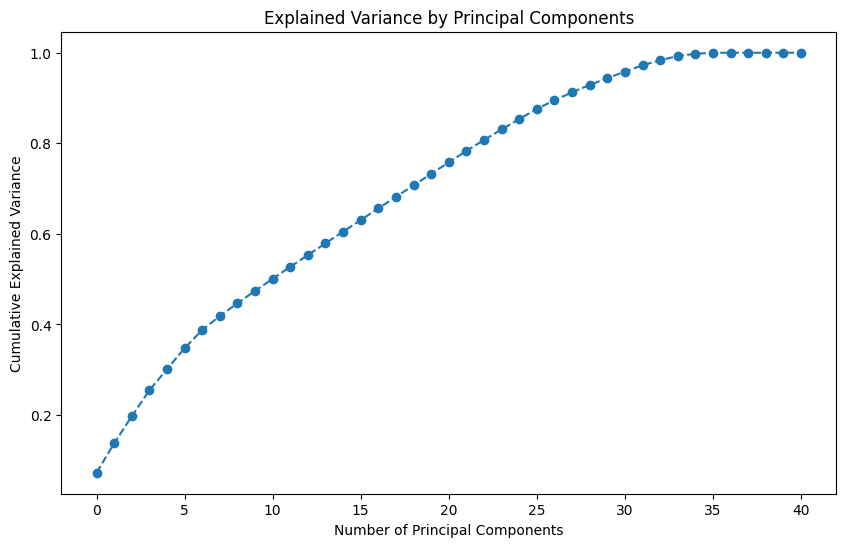

In [67]:
# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.show()

In [69]:
# Retain only the top components that explain ~95% of the variance
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1

# Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
pca_data_reduced = pca.fit_transform(scaled_df)

# Convert reduced PCA data to a DataFrame
pca_reduced_df = pd.DataFrame(pca_data_reduced, columns=[f"PC{i+1}" for i in range(n_components)])
print(pca_reduced_df.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  1.808754 -1.311930 -1.789925 -1.936813 -1.342234 -1.145669 -0.982861   
1  1.419288 -1.200107 -1.860215 -1.843031 -1.206806 -1.396806 -0.859958   
2  1.875976 -1.290159 -1.762444 -1.962216 -1.230947 -1.228876 -1.206463   
3  1.893066 -1.237458 -1.507265 -2.222810 -1.154812 -0.737988 -0.979129   
4  1.600170 -1.020070 -1.950357 -1.932923 -1.019153 -1.434881 -0.931795   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0  0.967547 -0.174639 -0.149677  0.647253  0.050398 -1.448352 -1.160452   
1  0.818058 -1.042590 -0.026397 -0.118915  0.127200 -1.494714 -1.086550   
2  0.866503 -0.192091 -0.204547  0.532790  0.137525 -1.692532 -1.085051   
3  0.326101 -0.457075 -0.268561  0.303887  0.112986 -1.386490 -1.250177   
4  1.005311 -0.086238 -0.124423  0.574031  0.153516 -1.677670 -1.039337   

       PC15      PC16      PC17      PC18      PC19      PC20      PC21  \
0 -0.870887  0.740760 -

# Step 3: K-Means Clustering

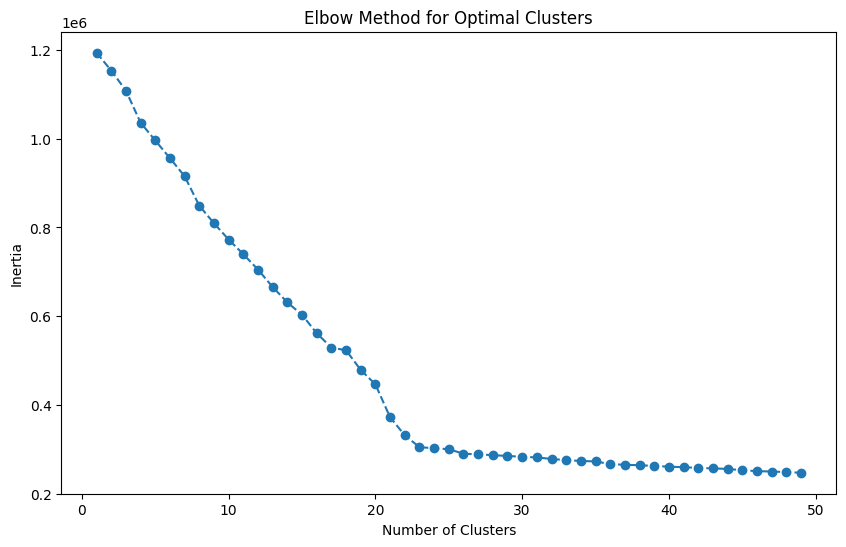

In [72]:
cluster_range = range(1, 50)

# Calculate inertia for each number of clusters
inertias = []
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_reduced_df)
    inertias.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertias, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

We used Silhouette Scoring to find the optimal number of clusters, but the code took over 20 minutes to run. So, we've included it below but commented it out. From running the function, we got 22 as the optimal number of clusters.

In [74]:
'''from sklearn.metrics import silhouette_score

# Range of cluster numbers to test
silhouette_scores = []
for k in range(2, 50):  # Silhouette score is not defined for k=1
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_reduced_df)
    score = silhouette_score(pca_reduced_df, kmeans.labels_)
    silhouette_scores.append(score)

# Plot Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 15), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Clusters')
plt.show()'''

"from sklearn.metrics import silhouette_score\n\n# Range of cluster numbers to test\nsilhouette_scores = []\nfor k in range(2, 50):  # Silhouette score is not defined for k=1\n    kmeans = KMeans(n_clusters=k, random_state=42)\n    kmeans.fit(pca_reduced_df)\n    score = silhouette_score(pca_reduced_df, kmeans.labels_)\n    silhouette_scores.append(score)\n\n# Plot Silhouette Scores\nplt.figure(figsize=(10, 6))\nplt.plot(range(2, 15), silhouette_scores, marker='o', linestyle='--')\nplt.xlabel('Number of Clusters')\nplt.ylabel('Silhouette Score')\nplt.title('Silhouette Score for Optimal Clusters')\nplt.show()"

In [77]:
from sklearn.cluster import KMeans

# Initialize K-means
n_clusters = 22 
kmeans = KMeans(n_clusters, random_state=42)  # Adjust the number of clusters as needed
kmeans.fit(pca_reduced_df)
cluster_labels = kmeans.fit_predict(pca_reduced_df)

# Add cluster labels to the dataset
pca_reduced_df['Cluster'] = kmeans.labels_
print(pca_reduced_df.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  1.808754 -1.311930 -1.789925 -1.936813 -1.342234 -1.145669 -0.982861   
1  1.419288 -1.200107 -1.860215 -1.843031 -1.206806 -1.396806 -0.859958   
2  1.875976 -1.290159 -1.762444 -1.962216 -1.230947 -1.228876 -1.206463   
3  1.893066 -1.237458 -1.507265 -2.222810 -1.154812 -0.737988 -0.979129   
4  1.600170 -1.020070 -1.950357 -1.932923 -1.019153 -1.434881 -0.931795   

        PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0  0.967547 -0.174639 -0.149677  0.647253  0.050398 -1.448352 -1.160452   
1  0.818058 -1.042590 -0.026397 -0.118915  0.127200 -1.494714 -1.086550   
2  0.866503 -0.192091 -0.204547  0.532790  0.137525 -1.692532 -1.085051   
3  0.326101 -0.457075 -0.268561  0.303887  0.112986 -1.386490 -1.250177   
4  1.005311 -0.086238 -0.124423  0.574031  0.153516 -1.677670 -1.039337   

       PC15      PC16      PC17      PC18      PC19      PC20      PC21  \
0 -0.870887  0.740760 -

In [79]:
from sklearn.manifold import TSNE

# t-Distributed Stochastic Neighbor Embedding to reduce dimensions so I can graph as a scatterplot

tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(pca_reduced_df.iloc[:, :31])

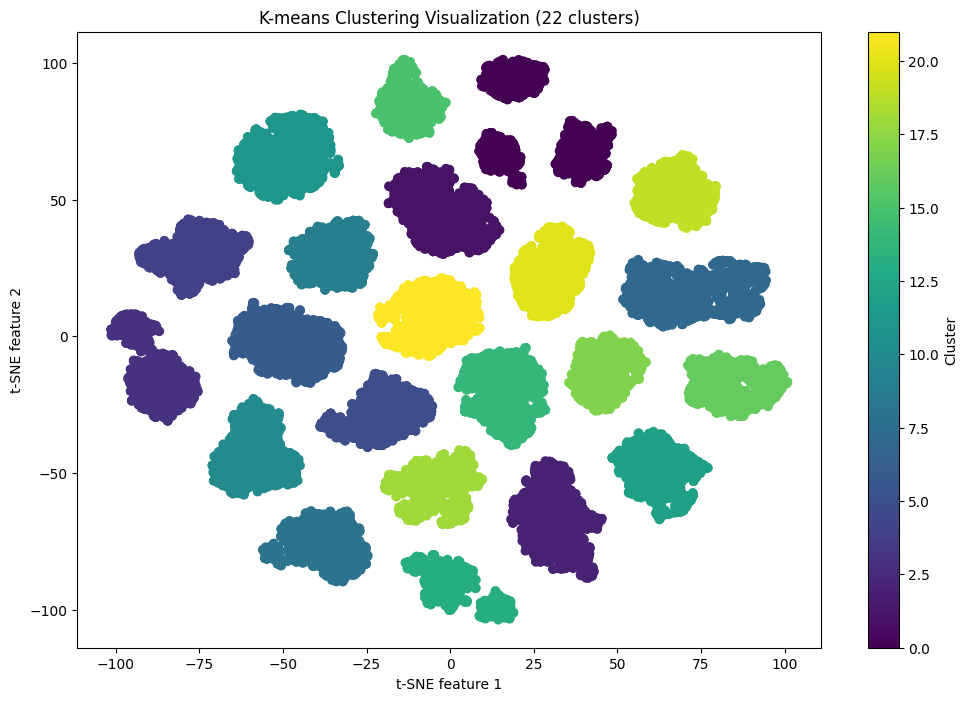

In [80]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=cluster_labels, cmap='viridis')
plt.title('K-means Clustering Visualization (22 clusters)')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.colorbar(scatter, label='Cluster')
plt.show()

In [86]:
# Check the unique clusters
print(pca_reduced_df['Cluster'].value_counts())

# Verify the cluster assignment of the input song
input_cluster = pca_reduced_df.loc[1200, 'Cluster']
print(f"Input song is in cluster: {input_cluster}")

Cluster
0     1929
7     1800
1     1671
6     1620
2     1614
11    1593
21    1517
14    1511
10    1441
3     1322
4     1312
20    1305
12    1298
8     1291
5     1288
9     1255
18    1243
16    1206
19    1156
17    1094
15     971
13     949
Name: count, dtype: int64
Input song is in cluster: 12


In [88]:
def find_song_cluster(song_name, artist_name, original_data, clustered_data):
    """
    Find the cluster for a song based on its name and artist.
    
    Parameters:
    - song_name (str): Name of the song.
    - artist_name (str): Name of the artist.
    - original_data (pd.DataFrame): Original dataset containing song details.
    - clustered_data (pd.DataFrame): DataFrame with cluster assignments.
    
    Returns:
    - int: Cluster number if the song is found.
    - str: Error message if the song is not found.
    """
    # Locate the song in the original data
    song_row = original_data[
        (original_data['track_name'].str.lower() == song_name.lower()) &
        (original_data['track_artist'].str.lower() == artist_name.lower())
    ]
    
    if song_row.empty:
        return f"Song '{song_name}' by '{artist_name}' not found in the dataset."
    
    # Get the index of the song in the original dataset
    song_index = song_row.index[0]
    
    # Find the cluster from the clustered data
    if song_index in clustered_data.index:
        cluster = clustered_data.loc[song_index, 'Cluster']
        return f"The song '{song_name}' by '{artist_name}' belongs to Cluster {cluster}."
    else:
        return f"Song found in the dataset, but cluster assignment is missing."

find_song_cluster("Memories - Dillon Francis Remix",
                  "Maroon 5",
                  new_data,
                  pca_reduced_df)

"The song 'Memories - Dillon Francis Remix' by 'Maroon 5' belongs to Cluster 12."

## Step 3: Assessment of Missingness

In [ ]:
# TODO

## Step 4: Hypothesis Testing

In [ ]:
# TODO

## Step 5: Framing a Prediction Problem

In [ ]:
# TODO

## Step 6: Baseline Model

In [ ]:
# TODO

## Step 7: Final Model

In [ ]:
# TODO

## Step 8: Fairness Analysis

In [ ]:
# TODO